Final Project Code 
Heart Disease prediction using ML
Sai Gaurav Daula
G01225856

In [1]:
import pandas as pd
import numpy as np

In [2]:
Hp = pd.read_csv('Heart_disease.csv')
Hp.head()

,Age,Gender,c_pain,rst_bp,chol_p,Fast_bp,r_ecg,Mhr_p,E_angina,o_peak,S_pe,M_vess,b_thalas,H_dise
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
Hp_targ = Hp.groupby('H_dise').size()
Hp_targ

H_dise
0    138
1    165
dtype: int64

In [4]:
Hp.dtypes

Age           int64
Gender        int64
c_pain        int64
rst_bp        int64
chol_p        int64
Fast_bp       int64
r_ecg         int64
Mhr_p         int64
E_angina      int64
o_peak      float64
S_pe          int64
M_vess        int64
b_thalas      int64
H_dise        int64
dtype: object

In [5]:
Hp.isnull().values.any()

False

In [6]:
Hp_co = Hp.corr()
Hp_co

,Age,Gender,c_pain,rst_bp,chol_p,Fast_bp,r_ecg,Mhr_p,E_angina,o_peak,S_pe,M_vess,b_thalas,H_dise
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
c_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rst_bp,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol_p,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Fast_bp,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
r_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Mhr_p,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
E_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
o_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


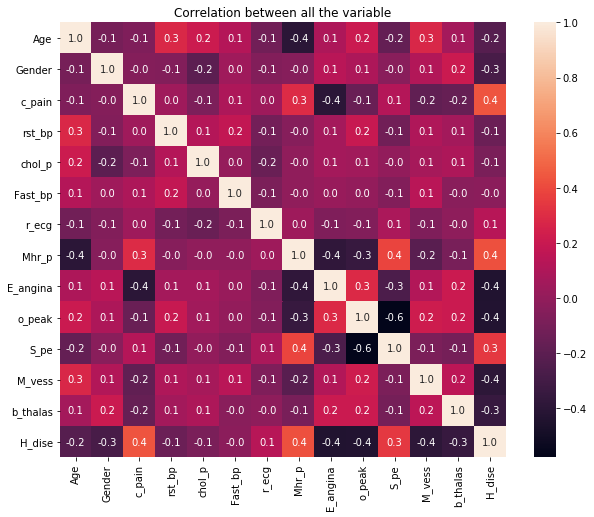

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
plt.title('Correlation between all the variable')
sns.heatmap(Hp.corr(), annot=True, fmt='.1f')
plt.show()

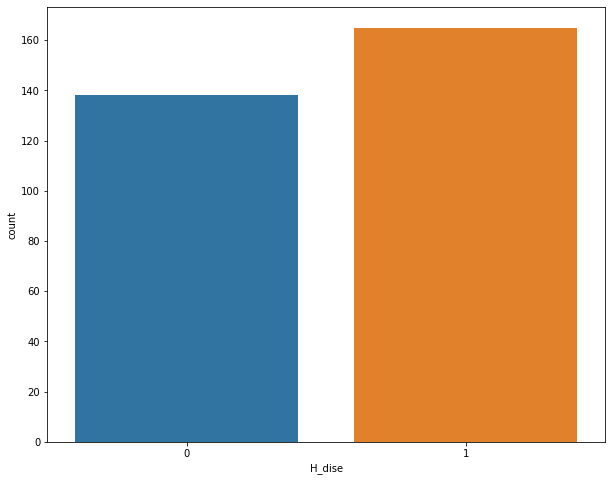

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(Hp['H_dise'], palette = 'tab10')

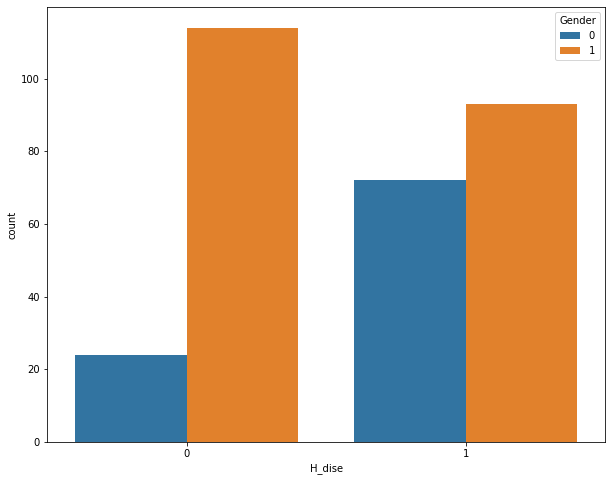

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(x='H_dise',hue='Gender',data=Hp)

In [10]:
Hp_Gndr = Hp.groupby(["H_dise","Gender"]).size()
Hp_Gndr

H_dise  Gender
0       0          24
        1         114
1       0          72
        1          93
dtype: int64

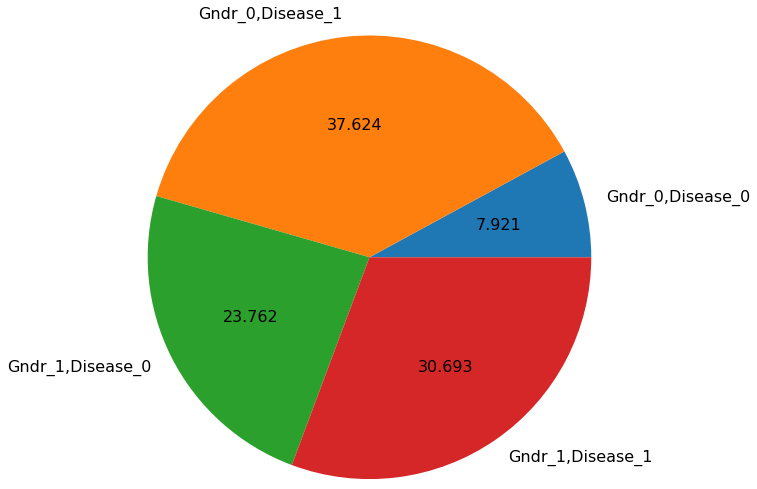

In [11]:
plt.pie(Hp_Gndr.values, labels = ["Gndr_0,Disease_0", "Gndr_0,Disease_1", "Gndr_1,Disease_0", "Gndr_1,Disease_1"],autopct='%.3f',radius = 2.55, textprops = {"fontsize" : 16})
plt.show()

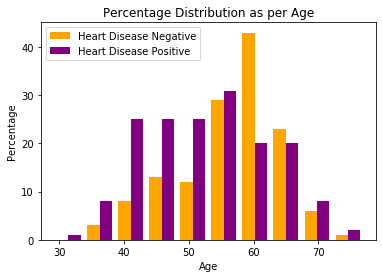

In [12]:
plt.hist([Hp[Hp.H_dise==0].Age, Hp[Hp.H_dise==1].Age], label = ["Heart Disease Negative","Heart Disease Positive"], color = ['orange','purple'])
plt.xlabel("Age") 
plt.ylabel("Percentage")
plt.title('Percentage Distribution as per Age')
plt.legend()
plt.show()

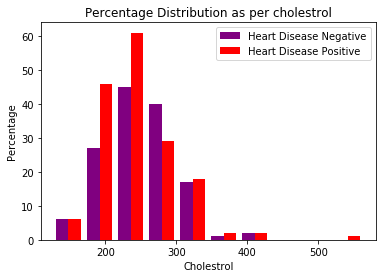

In [13]:
plt.hist([Hp[Hp.H_dise==0].chol_p, Hp[Hp.H_dise==1].chol_p], label = ["Heart Disease Negative","Heart Disease Positive"], color = ['purple','red'])
plt.xlabel("Cholestrol") 
plt.ylabel("Percentage")
plt.title('Percentage Distribution as per cholestrol')
plt.legend()
plt.show()

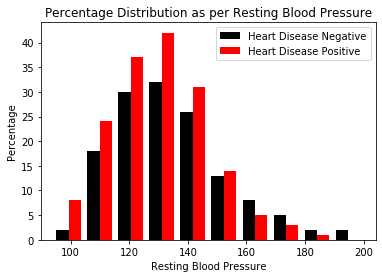

In [14]:
plt.hist([Hp[Hp.H_dise==0].rst_bp, Hp[Hp.H_dise==1].rst_bp], label = ["Heart Disease Negative","Heart Disease Positive"], color = ['black','red'])
plt.xlabel("Resting Blood Pressure") 
plt.ylabel("Percentage")
plt.title('Percentage Distribution as per Resting Blood Pressure')
plt.legend()
plt.show()

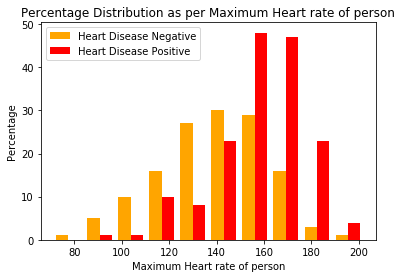

In [15]:
plt.hist([Hp[Hp.H_dise==0].Mhr_p, Hp[Hp.H_dise==1].Mhr_p], label = ["Heart Disease Negative","Heart Disease Positive"], color = ['orange','red'])
plt.xlabel("Maximum Heart rate of person") 
plt.ylabel("Percentage")
plt.title('Percentage Distribution as per Maximum Heart rate of person')
plt.legend()
plt.show()

In [16]:
X=Hp.iloc[:, :-1].values
print(X)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [17]:
y = Hp.iloc[:,13]
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: H_dise, Length: 303, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.70, random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (212, 13) (212,)
Test set: (91, 13) (91,)


In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import scale
x_n = preprocessing.scale(X_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def evaluation(model, X_train, y_train, X_test, y_test, train = True):
    if train == True:
        pred = model.predict(X_train)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    if train == False:
        pred = model.predict(X_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
evaluation(lr, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 86.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.882353    0.850394  0.863208    0.866373      0.864564
recall      0.797872    0.915254  0.863208    0.856563      0.863208
f1-score    0.837989    0.881633  0.863208    0.859811      0.862281
support    94.000000  118.000000  0.863208  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 75  19]
 [ 10 108]]

Test Result:
Accuracy Score: 81.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.864865   0.777778  0.813187   0.821321      0.819886
recall      0.727273   0.893617  0.813187   0.810445      0.813187
f1-score    0.790123   0.831683  0.813187   0.810903      0.811588
support    44.000000  47.000000  0.813187  91.000000     91.000000
_____________

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs = 10)
knn.fit(X_train, y_train)

evaluation(knn, X_train, y_train, X_test, y_test, True)
evaluation(knn, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 84.91%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.860465    0.841270  0.849057    0.850867      0.849781
recall      0.787234    0.898305  0.849057    0.842770      0.849057
f1-score    0.822222    0.868852  0.849057    0.845537      0.848177
support    94.000000  118.000000  0.849057  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 74  20]
 [ 12 106]]

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.888889   0.781818  0.824176   0.835354      0.833589
recall      0.727273   0.914894  0.824176   0.821083      0.824176
f1-score    0.800000   0.843137  0.824176   0.821569      0.822280
support    44.000000  47.000000  0.824176  91.000000     91.000000
_____________

In [24]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm.fit(X_train, y_train)

evaluation(svm, X_train, y_train, X_test, y_test, True)
evaluation(svm, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 91.98%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.932584    0.910569  0.919811    0.921577      0.920331
recall      0.882979    0.949153  0.919811    0.916066      0.919811
f1-score    0.907104    0.929461  0.919811    0.918282      0.919548
support    94.000000  118.000000  0.919811  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 83  11]
 [  6 112]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.891892   0.796296  0.835165   0.844094      0.842518
recall      0.750000   0.914894  0.835165   0.832447      0.835165
f1-score    0.814815   0.851485  0.835165   0.833150      0.833754
support    44.000000  47.000000  0.835165  91.000000     91.000000
_____________

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()
Dt.fit(X_train,y_train)

evaluation(Dt, X_train, y_train, X_test, y_test, False)

Test Result:
Accuracy Score: 74.73%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.733333   0.760870  0.747253   0.747101      0.747555
recall      0.750000   0.744681  0.747253   0.747340      0.747253
f1-score    0.741573   0.752688  0.747253   0.747131      0.747314
support    44.000000  47.000000  0.747253  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[33 11]
 [12 35]]



In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

evaluation(Dt, X_train, y_train, X_test, y_test, False)

Test Result:
Accuracy Score: 74.73%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.733333   0.760870  0.747253   0.747101      0.747555
recall      0.750000   0.744681  0.747253   0.747340      0.747253
f1-score    0.741573   0.752688  0.747253   0.747131      0.747314
support    44.000000  47.000000  0.747253  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[33 11]
 [12 35]]



In [32]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(lr, X_train, y_train, cv=10, scoring='accuracy', n_jobs = -1)
print(cv_score, end='\n\n')
print('Mean accuracy (cross-validation) Logistic regression %f ' % np.mean(cv_score))

[0.77272727 0.81818182 0.80952381 0.9047619  0.76190476 0.80952381
 0.76190476 0.85714286 0.80952381 0.85714286]

Mean accuracy (cross-validation) Logistic regression 0.816234 


In [33]:
cv_score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy', n_jobs = -1)
print(cv_score, end='\n\n')
print('Mean accuracy (cross-validation) KNN-Classifier %f ' % np.mean(cv_score))

[0.81818182 0.81818182 0.71428571 0.9047619  0.80952381 0.80952381
 0.80952381 0.76190476 0.80952381 0.80952381]

Mean accuracy (cross-validation) KNN-Classifier 0.806494 


In [53]:
cv_score = cross_val_score(svm, X_train, y_train, cv=10, scoring='accuracy', n_jobs = -1)
print(cv_score, end='\n\n')
print('Mean accuracy (cross-validation) Support Vector Machine %f ' % np.mean(cv_score))

[0.81818182 0.72727273 0.85714286 0.85714286 0.9047619  0.71428571
 0.71428571 0.76190476 0.80952381 0.80952381]

Mean accuracy (cross-validation) Support Vector Machine 0.797403 


In [55]:
cv_score = cross_val_score(Dt, X_train, y_train, cv=10, scoring='accuracy', n_jobs = -1)
print(cv_score, end='\n\n')
print('Mean accuracy (cross-validation) Decision Tree %f ' % np.mean(cv_score))

[0.63636364 0.81818182 0.80952381 0.85714286 0.85714286 0.80952381
 0.76190476 0.71428571 0.76190476 0.80952381]

Mean accuracy (cross-validation) Decision Tree 0.783550 


In [54]:
cv_score = cross_val_score(gnb, X_train, y_train, cv=10, scoring='accuracy', n_jobs = -1)
print(cv_score, end='\n\n')
print('Mean accuracy (cross-validation) Gaussian Navie Bayes %f ' % np.mean(cv_score))

[0.77272727 0.77272727 0.80952381 0.9047619  0.9047619  0.76190476
 0.95238095 0.76190476 0.76190476 0.85714286]

Mean accuracy (cross-validation) Gaussian Navie Bayes 0.825974 


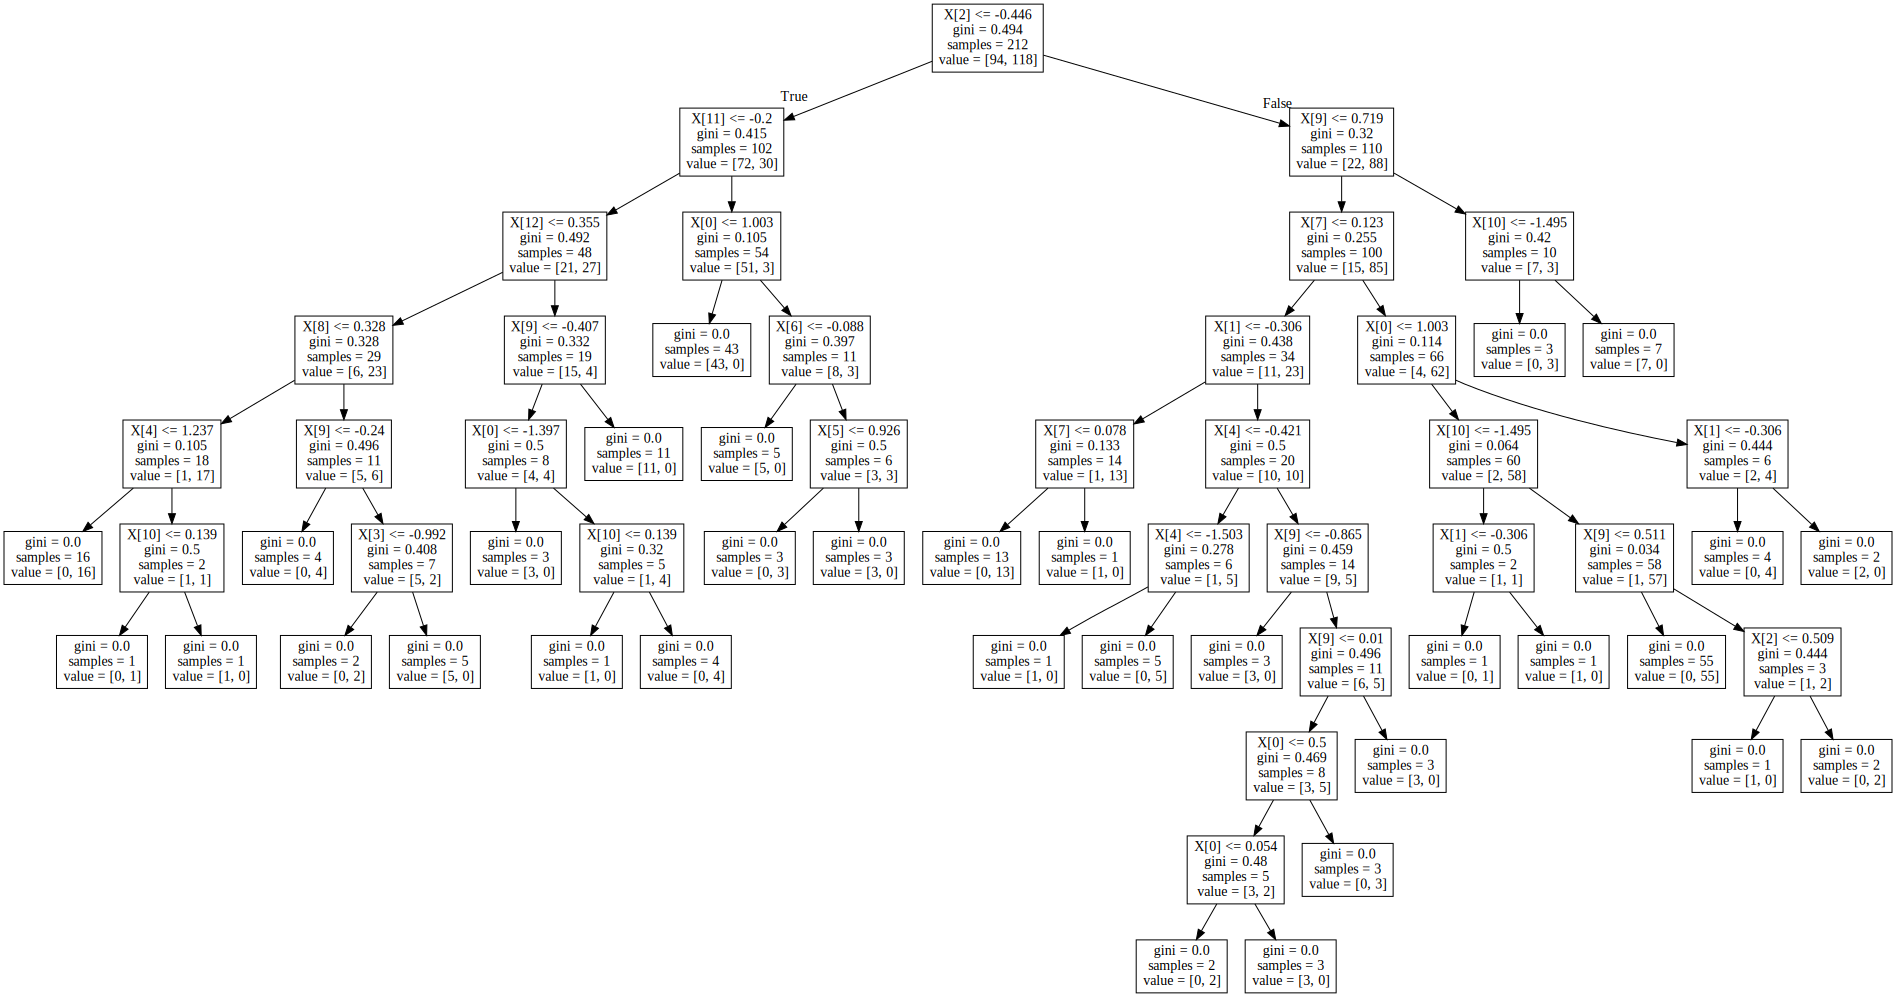

In [46]:
from sklearn import tree
import graphviz
tree_graph = tree.export_graphviz(Dt, out_file=None)
graphviz.Source(tree_graph)

In [52]:
import graphviz
from graphviz import Source

graph = Source(tree.export_graphviz(Dt, out_file=None))
graph.format = 'png'
graph.render('Dt_render',view=True)

'Dt_render.png'